# Task 4 To  Explore Decision Tree Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
print("Shape of the Data : {}".format(df.shape))

Shape of the Data : (150, 6)


In [5]:
df = df.set_index("Id")
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


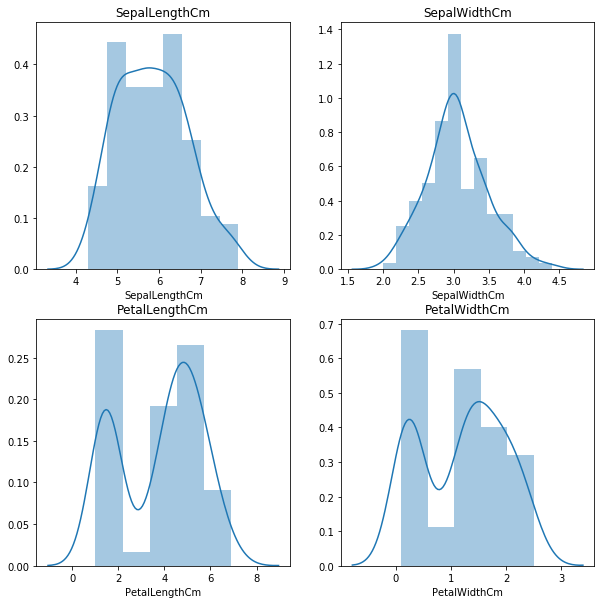

In [6]:
a = 1
fig = plt.figure(figsize = (10,10)) 
columns = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
for var in columns:
    ax = fig.add_subplot(2,2,a)
    sns.distplot(df[var] , ax = ax )
    plt.title(var)
    a = a + 1
plt.show()

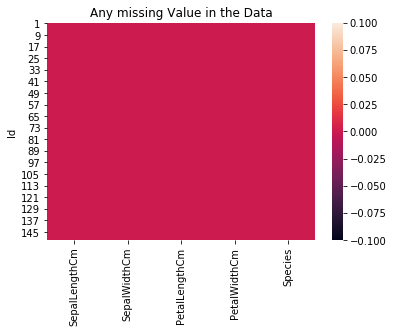

In [7]:
sns.heatmap(df.isnull())
plt.title("Any missing Value in the Data")
plt.show()

In [8]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

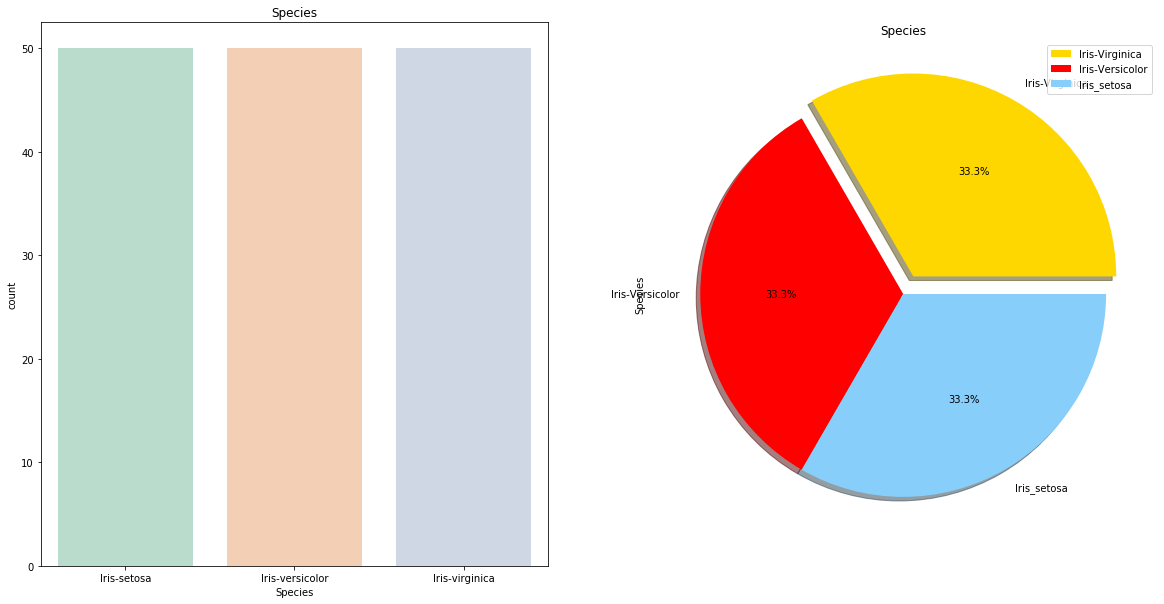

In [9]:
fig ,ax = plt.subplots(1,2,figsize =(20,10))
sns.countplot(x="Species" ,data = df ,palette = "Pastel2" ,ax = ax[0])
ax[0].set_title("Species")
colors = ["gold" ,"red" ,"lightskyblue"]
ax[1].set_title("Species")
labels =["Iris-Virginica","Iris-Versicolor","Iris_setosa"]
df.Species.value_counts().plot.pie(explode = [0.1,0,0] ,autopct="%1.1f%%" ,shadow = True,ax=ax[1] , labels = labels , colors = colors )
ax[1].legend(labels ,loc = "upper right")
plt.show()

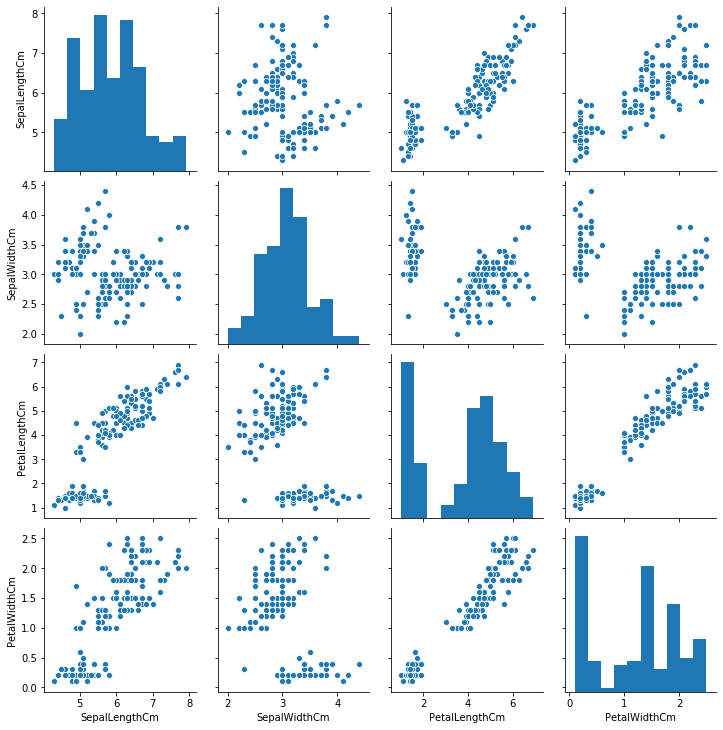

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
categories = {"Iris-virginica"    :  0,
               "Iris-versicolor"  :  1,
              "Iris-setosa"       :  2,}
df["Species"] = df.Species.map(categories)

In [12]:
x = df.iloc[: ,:-1]
y = df.iloc[:,-1]

In [13]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [14]:
y.head()

Id
1    2
2    2
3    2
4    2
5    2
Name: Species, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg


# Train Test Split

In [16]:
x_train,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.3  , random_state = 0)
print("shape of train data :{} and test data :{}".format(x_train.shape ,x_test.shape))

shape of train data :(105, 4) and test data :(45, 4)


In [28]:
DC = DecisionTreeClassifier(max_depth = 4 , criterion = "gini" , min_samples_split = 5)
DC.fit(x_train,y_train)
pred = DC.predict(x_test)
print(accuracy_score(y_test , pred))

0.9777777777777777


In [39]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
115,5.8,2.8,5.1,2.4
63,6.0,2.2,4.0,1.0
34,5.5,4.2,1.4,0.2
108,7.3,2.9,6.3,1.8
8,5.0,3.4,1.5,0.2
101,6.3,3.3,6.0,2.5
41,5.0,3.5,1.3,0.3
87,6.7,3.1,4.7,1.5
77,6.8,2.8,4.8,1.4


In [41]:
a = DC.predict([[7.0,2.5,3.0,4.2]])
a

array([0], dtype=int64)

In [43]:
import pickle
# Saving model to disk
pickle.dump(DC, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[7.0,2.5,3.0,4.2]])[0])

0


In [20]:
@interact
def plot_tree(crit=["gini", "entropy"],
              split=["best", "random"],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = DecisionTreeClassifier(random_state=0,
                                       criterion=crit,
                                       splitter = split,
                                       max_depth = depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf)
    estimator.fit(x_train, y_train)
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(x_train))))
    print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(x_test))))

    graph = Source(tree.export_graphviz(estimator,
                                        out_file=None,
                                        feature_names=x_train.columns,
                                        class_names=['0', '1' ,"2"],
                                        filled = True))
    
    
    display(SVG(graph.pipe(format='svg')))
    
    return estimator


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [26]:
from IPython.display import SVG
from graphviz import Source
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from ipywidgets import interactive
from IPython.display import display 

data = load_iris()

#Get the feature matrix
features = data.data

#Get the labels for the sampels
target_label = data.target

#Get feature names
feature_names = data.feature_names
def plot_tree(crit, split, depth, min_split, min_leaf=0.17):
    classifier = DecisionTreeClassifier(random_state = 123, criterion = crit, splitter = split, max_depth = depth, min_samples_split=min_split)
    classifier.fit(features, target_label)

    graph = Source(tree.export_graphviz(classifier, out_file=None, feature_names=feature_names, class_names=['0', '1', '2'], filled = True))

    display(SVG(graph.pipe(format='svg')))
    return classifier
decision_plot = interactive(plot_tree, crit = ["gini", "entropy"], split = ["best", "random"]  , depth=[1, 2, 3, 4, 5, 6, 7], min_split=(0.1,1))

display(decision_plot)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…